**Reading the Data**
* From csv file, and set the indexes

In [10]:

from datetime import datetime

from joblib import load, dump

import numpy as np
import math
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,f1_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import torch
import torch.nn as nn

import import_ipynb

from pca import *
from prepare_data import *
from plot_figures import *
from NNpythorch import *

importing Jupyter notebook from pca.ipynb


In [11]:
[data,train_set,validation_set,test_set] = load_and_normalize_data()

<string>:3: DtypeWarning: Columns (150) have mixed types. Specify dtype option on import or set low_memory=False.


In [12]:

column_y=data.columns[-1]

[X,y]=split_Xy(train_set) 
[X_val,y_val]=split_Xy(validation_set) 
[X_test,y_test]=split_Xy(test_set) 

[X_all,y_all]=split_Xy(data) 



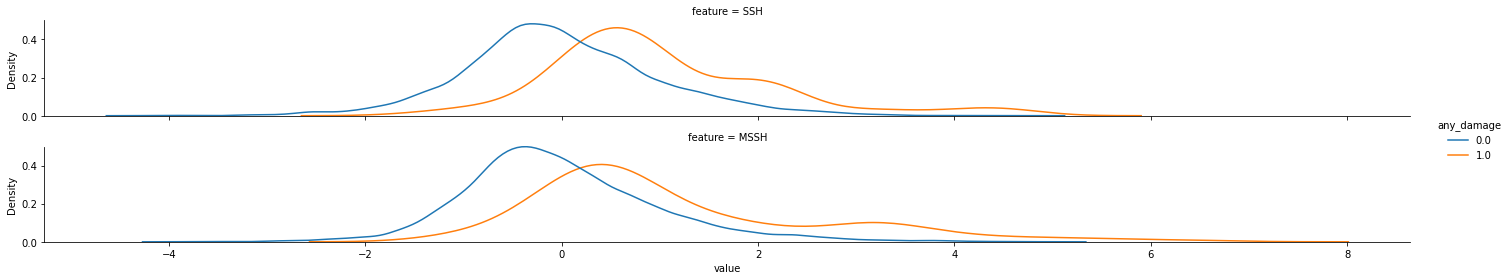

In [13]:
create_figure_distribution(train_set)

In [14]:
classifier_list =  []
classifier_list.append (RandomForestClassifier(n_estimators = 200, max_depth =6, min_samples_split =2, class_weight="balanced",random_state=0))
classifier_list.append (SVC(C=1, probability = True, class_weight="balanced"))

names=['RF','SVC']

In [15]:
pos_weight = torch.tensor(X[y.any_damage == 0].shape[0] / X[y.any_damage ==  1].shape[0 ], dtype=torch.float)
weights_val = [pos_weight if x == 1 else 1 for x in y_val.any_damage]
criterion_weight = nn.BCELoss(weight=torch.tensor(weights_val, dtype=torch.double))
criterion = nn.BCELoss()
#mean_squared_error(y_val_predictions,y_val, squared = False)

In [16]:
for id0,classifier in enumerate(classifier_list):  
    classifier.fit(X, np.ravel(y))
    y_predict = classifier.predict_proba(X)[:,1]
    #loss = criterion_weight(torch.tensor(np.ravel(y_predict)), torch.tensor(np.ravel(y.values)))
    y_predict_val = classifier.predict_proba(X_val)[:,1]
    loss_val = criterion_weight(torch.tensor(np.ravel(y_predict_val)), torch.tensor(np.ravel(y_val.values)))
    
      
    print('name : {}, loss_val {}'.format(names[id0],loss_val))

name : RF, loss_val 0.9907657477038739
name : SVC, loss_val 3.9873070945219444


In [22]:
import torch
torch.manual_seed(1)
modes = [ 'weight']

X_val_tensor = torch.tensor(X_val.values, dtype=torch.float)
y_val_tensor = torch.tensor(np.ravel(y_val.values), dtype=torch.float)
y_val_long = torch.tensor(np.ravel(y_val.values), dtype=torch.long)

X_all_tensor = torch.tensor(X_all.values, dtype=torch.float)
y_all_tensor = torch.tensor(np.ravel(y_all.values), dtype=torch.float)

for imode,mode in enumerate(modes):    
    
    [net, optimizer, criterion, criterion_val,X_train_tensor, y_train_tensor,train_dataset,train_loader] = create_input_for_NN(
        X,y,num_hidden_layers = 2 , lr =1e-2 )
    
    training_NN(net=net, optimizer = optimizer, criterion=criterion,train_loader=train_loader, niter = 200)

    m = nn.Sigmoid()
    outputs = m(net(X_train_tensor))
    outputs_val =  m(net(X_val_tensor))
    loss_val = criterion_weight(torch.flatten(outputs_val), torch.flatten(y_val_tensor))
    
    outputs_all =  m(net(X_all_tensor))
    
       
    print('mode : {}, loss_val {}'.format(mode,loss_val))
    
    data[mode] = outputs_all.detach().numpy()  

AssertionError: the number of hidden layers is wrong

In [ ]:
#nn.Sigmoid()
###    +
#torch.nn.BCELoss(weight=None, size_average=None, reduce=None, reduction='mean')
###    =
#torch.nn.BCEWithLogitsLoss(weight=None, size_average=None, reduce=None, reduction='mean', pos_weight=None)

#torch.nn.Softmax(dim=None)# A dimension along which Softmax will be computed (so every slice along dim will sum to 1).
###    +
#torch.nn.NLLLoss(weight=None, size_average=None, ignore_index=- 100, reduce=None, reduction='mean')
###    =
#torch.nn.CrossEntropyLoss(weight=None, size_average=None, ignore_index=- 100, reduce=None, reduction='mean', label_smoothing=0.0)



In [ ]:
#data = pd.merge(data,rd_data,left_index=True, right_index= True, how = 'outer')


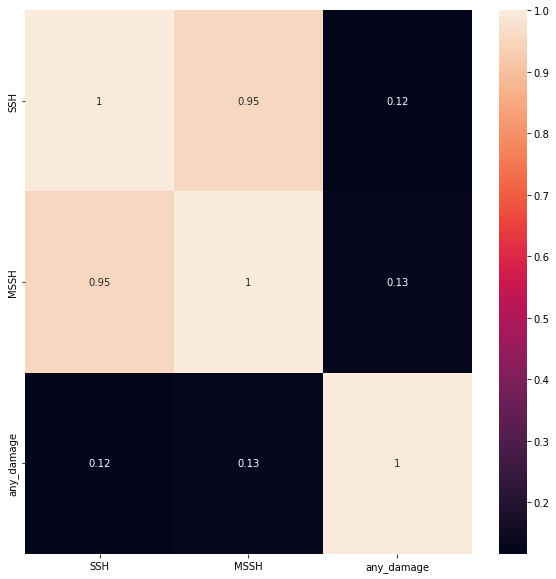

In [ ]:

correlation_matrix=data.corr(method ='pearson')

plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [ ]:
run_PCA(data)